# EDA, Feature Engineering and LOGISTIC Regression(Classification Model)  
## (Diabetes Dataset)


GitHub : https://github.com/raviteja-padala/Machine-Learning-Algorithms

Dataset: "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

*About the Data set*: This dataset is originally from the National Institute of Diabetes . The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.. 


**Problem Statement**
To build a model to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset using Logistic Regression model.


*Logistic Regression:* Logistic regression (or logit regression) is a supervised classification algorithm that is used to estimate the probability that an occurrence belongs to a classification.It calculates the probability that a given value belongs to a specific class.



1. Exploratory Data Analysis and Feature Engineering

* Data Description
* Data Exploration
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling

2. Logistic Regression Model

* Logistic Regression
* Performance metrics for above models




In [1]:
#importing libraries

import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [2]:
#importng dataset

dataset=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
### exporting file to csv for future use
#dataset.to_csv("diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Description

The dataset has 8 independent features and 1 dependent target feature.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)

* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [6]:
#Describing dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


*Glucose, BloodPressure, SkinThickness, Insulin and BMI have min values as 0 which are not real clinical values.*

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# shape of dataset
dataset.shape

(768, 9)

In [9]:
# Unique values in data set
for feature in dataset.columns:
    print("{} has {} number of unique categories".format(feature, dataset[feature].nunique()))

Pregnancies has 17 number of unique categories
Glucose has 136 number of unique categories
BloodPressure has 47 number of unique categories
SkinThickness has 51 number of unique categories
Insulin has 186 number of unique categories
BMI has 248 number of unique categories
DiabetesPedigreeFunction has 517 number of unique categories
Age has 52 number of unique categories
Outcome has 2 number of unique categories


In [10]:
# Checking Missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values are present in the data set. 

However from the above describe data  we can see that Glucose, BloodPressure, SkinThickness, Insulin and BMI have min values as 0 which are not real clinical values. Lets look at counts. 


In [11]:
print("Number of 0's in Glucose feature:", dataset['Glucose'].isin([0]).sum())
print("Number of 0's in Blood Pressure:", dataset['BloodPressure'].isin([0]).sum())
print("Number of 0's in Skin Thickness:", dataset['SkinThickness'].isin([0]).sum())
print("Number of 0's in Insulin:", dataset['Insulin'].isin([0]).sum())
print("Number of 0's in BMI:", dataset['BMI'].isin([0]).sum())

Number of 0's in Glucose feature: 5
Number of 0's in Blood Pressure: 35
Number of 0's in Skin Thickness: 227
Number of 0's in Insulin: 374
Number of 0's in BMI: 11


In [12]:
glucose = dataset['Glucose'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Glocuse: %.2f" % glucose)

bloodpressure = dataset['BloodPressure'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Blood Pressure: %.2f" % bloodpressure)

skinthickness = dataset['SkinThickness'].isin([0]).sum() / 768*100,
print("Percentage of 0 values in Skin Thickness: %.2f" % skinthickness)

insulin = dataset['Insulin'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Insulin: %.2f" % insulin)

bmi = dataset['BMI'].isin([0]).sum() / 768*100
print("Percentage of 0 values in for BMI: %.2f" % bmi)


Percentage of 0 values in Glocuse: 0.65
Percentage of 0 values in Blood Pressure: 4.56
Percentage of 0 values in Skin Thickness: 29.56
Percentage of 0 values in Insulin: 48.70
Percentage of 0 values in for BMI: 1.43


 We can see that the 0 values are between 0.65%-48.6% of data for these variables, we need to perform data cleaning to get even data.

In [13]:
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data

### creating copy of dataset for further analysis so that we can also perform data cleaning on copied dataset.

data=dataset.copy()


In [14]:
### Replacing zero values in feature with mean values of that feature

for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[feature]=data[feature].replace(0,data[feature].mean())

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


#### Distribution of features

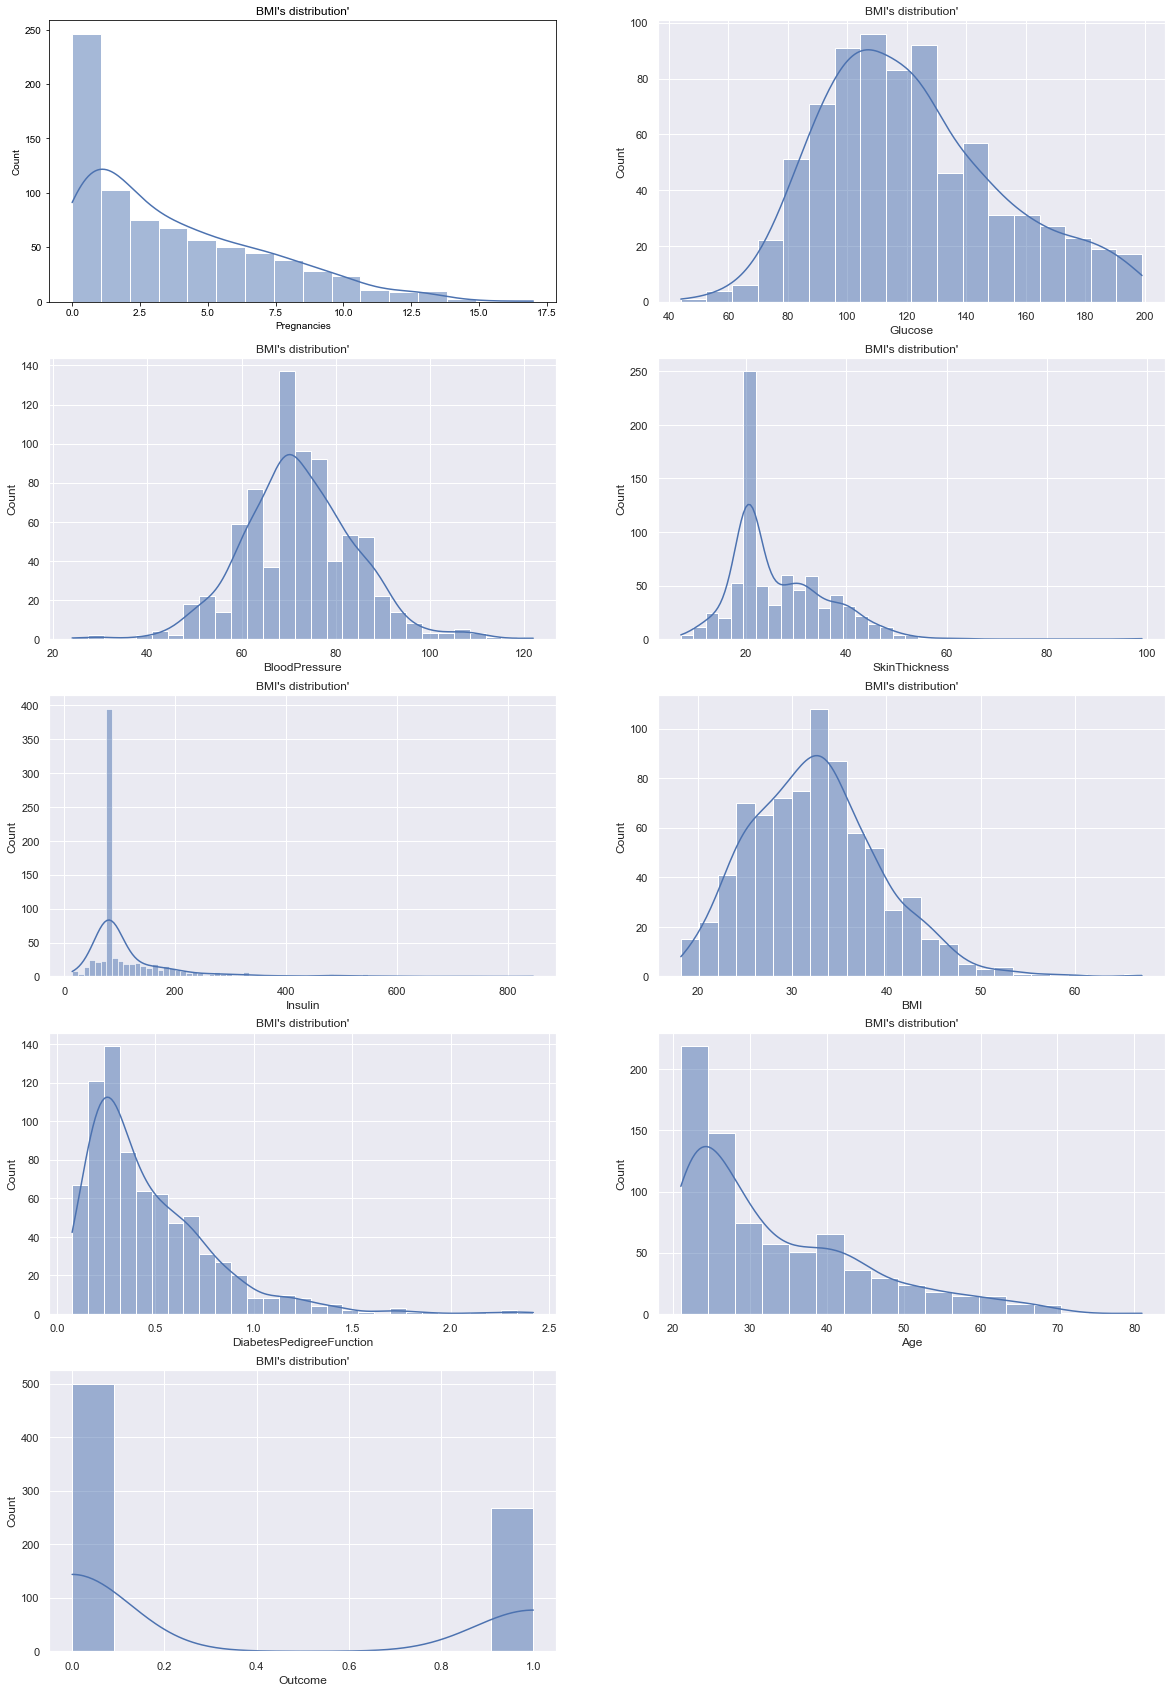

In [16]:

plt.figure(figsize=(20,30))
for i in enumerate(data.columns):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=data, x=i[1], kde=True)
    plt.title("{}'s distribution'".format(feature))

##### Observations:

* Pregnancies has right skewed distribution, this indicates this feature has outliers towards right side of distribution.
* Glucose has outliers towards left side of distribution.
* BloodPressure has outliers towards left side of distribution.
* Insulin has right skewed distribution, this indicates this feature has outliers towards right side of distribution.
* BMI has outliers towards left side of distribution.
* DiabetesPedigreeFunction has outliers towards left side of distribution.
* Age has outliers towards left side of distribution.

In [17]:
### Getting independent features
independent_features=[feature for feature in data.columns if feature not in ['Outcome']]
print(independent_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### Outliers in features

<AxesSubplot:>

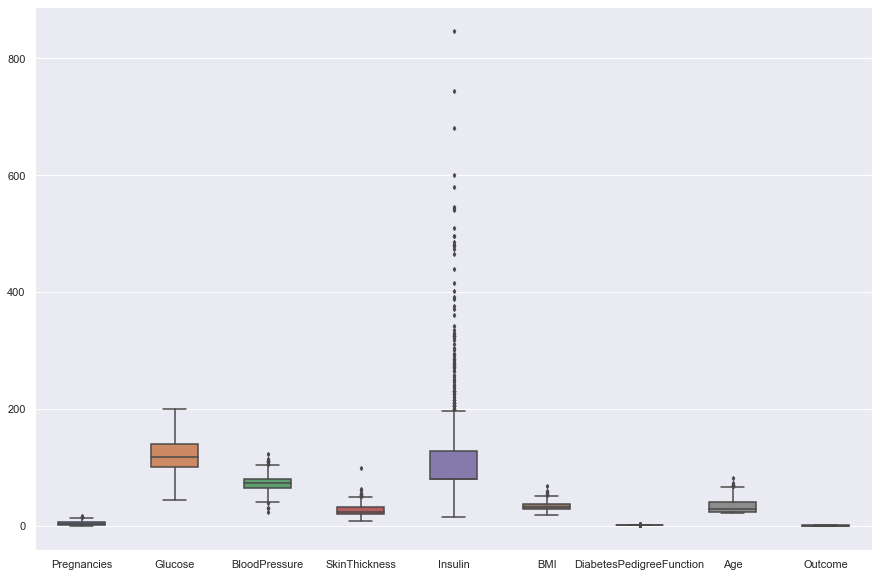

In [18]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

Observations
Note: Some outliers are already handled when we replaced the zreo values with mean.


* Glucose has zero outliers.

* Pregnancies has some outliers on upper boundary side.

* BloodPressure has outliers on both sides of boundary.
 
* SkinThickness, BMI and Age have outliers on upper boundary side.

* Insulin and DiabetesPedigreeFunction has large no of outliers on upper boundary side.

In [19]:
#Trimming outliers

def outlier_trimmer_upper(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]<threshold]
    return data_set

def outlier_trimmer_lower(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]>threshold]
    return data_set

In [20]:
### shape of data before trimming
print("Data shape before Trimmimg=", data.shape)

Data shape before Trimmimg= (768, 9)


In [21]:
### removing 1 percent outliers in BloodPressure, SkinThickness, BMI and Age as these feature has less no of outliers

for feature in ['BloodPressure', 'SkinThickness', 'BMI', 'Age']:
    data=outlier_trimmer_upper(data, feature, 99)
      
      

In [22]:
### shape of data after trimming
print("Data shape after Trimmimg=", data.shape)

Data shape after Trimmimg= (733, 9)


In [23]:
### removing 2 percent outliers in Insulin and DiabetesPedigreeFunction as they have large no of outliers

for feature in ['Insulin', 'DiabetesPedigreeFunction']:
    data=outlier_trimmer_upper(data, feature, 98)

In [24]:
data.shape

(703, 9)

In [25]:
### removing 0.5 percent outliers in BMI, Glucose, BloodPressure on lower side

for feature in ['Glucose', 'BloodPressure', 'BMI' ]:
    data=outlier_trimmer_lower(data, feature, 0.5)

In [26]:
data.shape

(688, 9)

In [27]:
data['Outcome'].value_counts()

0    453
1    235
Name: Outcome, dtype: int64

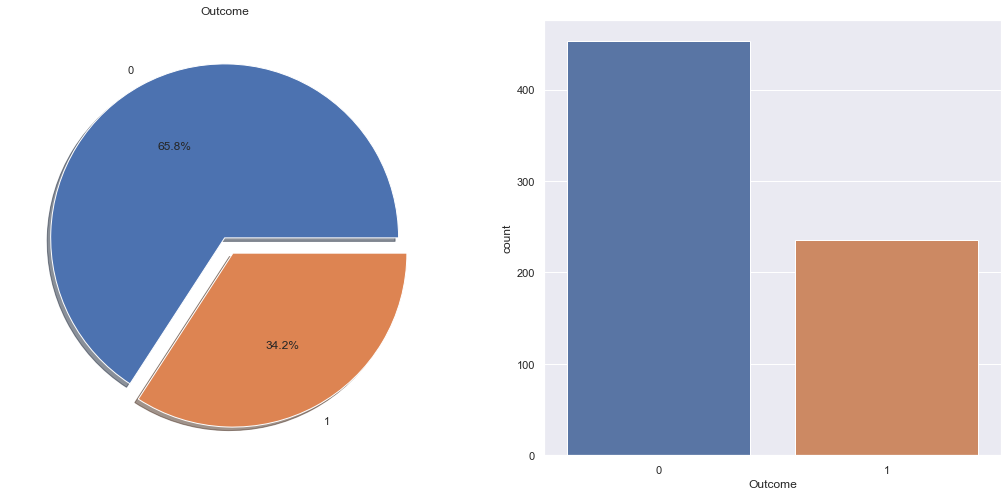

In [28]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])

plt.show()

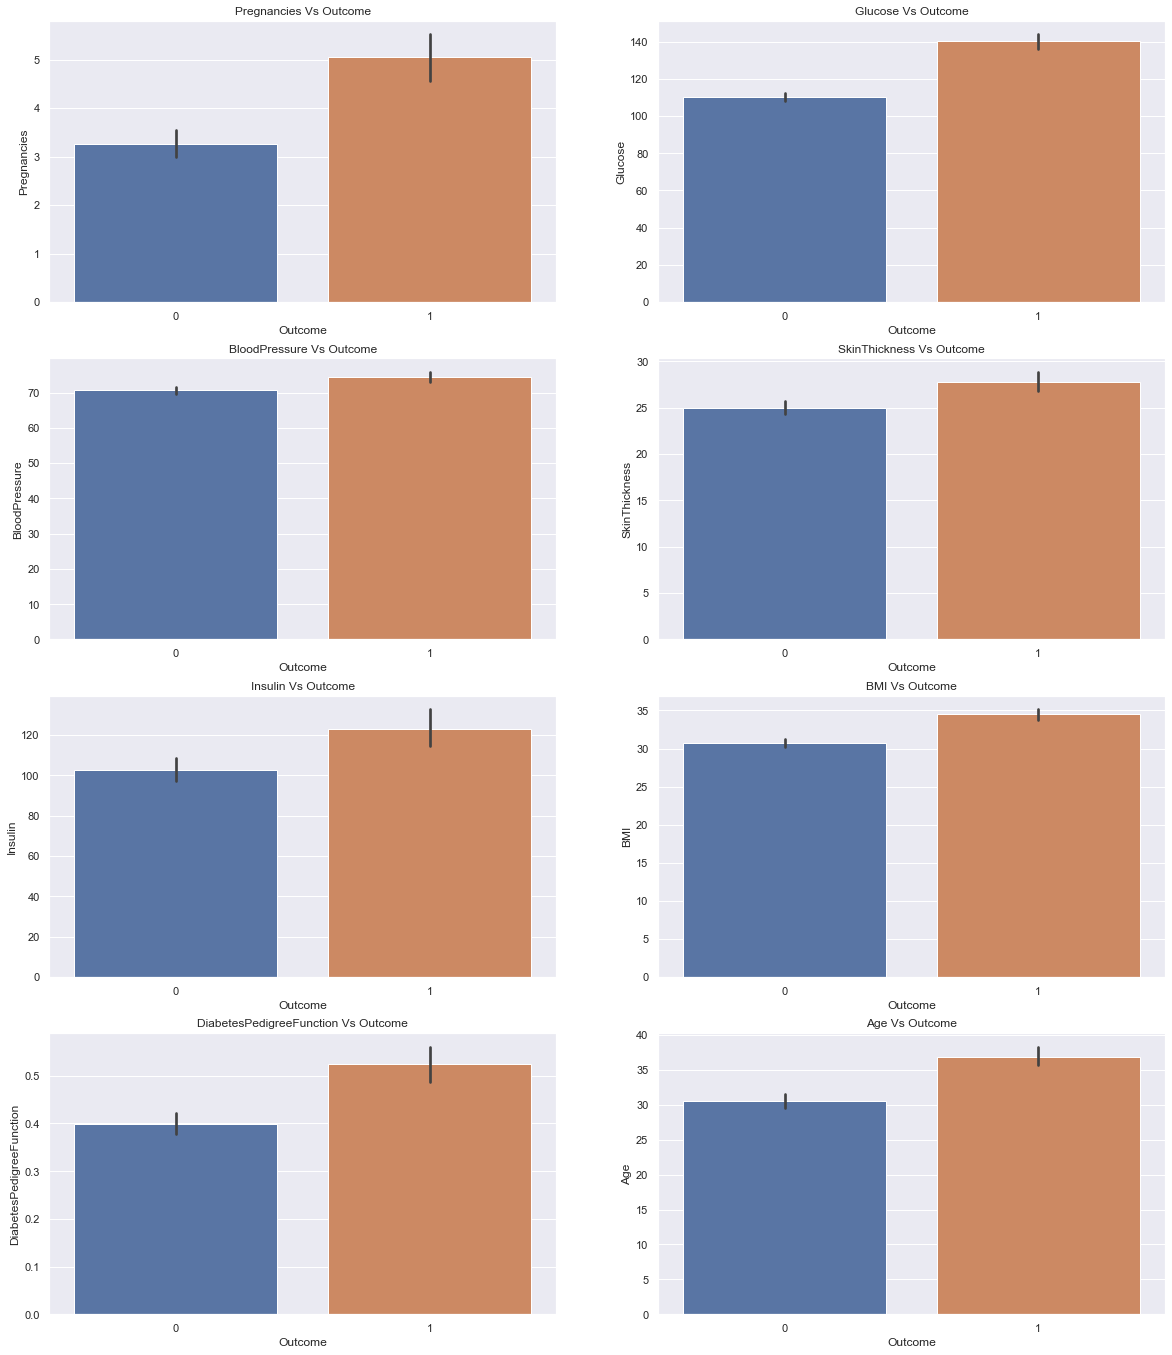

In [29]:
# Relationship between independent features and OUTCOME feature

plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.barplot(data=data, y=i[1], x='Outcome')
    plt.title("{} Vs Outcome".format(i[1]))

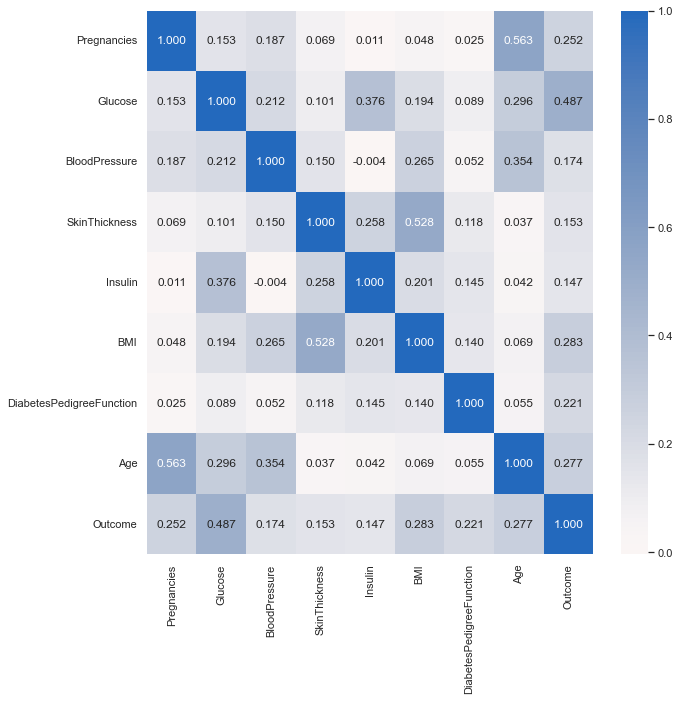

In [30]:
plt.figure(figsize = [10, 10])
sns.heatmap(data.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

###  Model Building
#### Getting independent features in dataset(X) and dependent feature in series(y)

In [31]:
#taking all the independent features on X label and dependent target feature on y label

X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [32]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [33]:
#Splitting data into Training and Test data

### random state train test split will be same with all people using random_state=16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [34]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
746,1,147.0,94.0,41.000000,79.799479,49.3,0.358,27
264,4,123.0,62.0,20.536458,79.799479,32.0,0.226,35
340,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
322,0,124.0,70.0,20.000000,79.799479,27.4,0.254,36
565,2,95.0,54.0,14.000000,88.000000,26.1,0.748,22


In [35]:
y_train.head()

746    1
264    1
340    0
322    1
565    0
Name: Outcome, dtype: int64

In [36]:
print(X_train.shape)
print(y_train.shape)

(584, 8)
(584,)


In [37]:
print(X_test.shape)
print(y_test.shape)

(104, 8)
(104,)


In [38]:
#Standardisation/ feature scaling the dataset

scaler=StandardScaler()
scaler

StandardScaler()

In [39]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.86019009,  0.94854966,  2.01983918, ...,  2.89360233,
        -0.31591105, -0.51401632],
       [ 0.04169683,  0.1172319 , -0.91556073, ...,  0.016956  ,
        -0.79724224,  0.20241693],
       [-0.86019009,  0.35969958, -0.18171075, ..., -0.99735282,
         0.09978406, -0.9617871 ],
       ...,
       [ 0.3423258 , -0.47161818,  0.91906421, ...,  1.26405701,
        -0.57845534,  0.47107939],
       [ 1.84547065, -0.64480938,  1.2859892 , ...,  2.27836583,
         2.52102579,  0.47107939],
       [ 1.54484168,  1.74522918,  0.18521424, ...,  2.01231762,
        -0.15182088,  0.91885017]])

In [40]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[ 6.42954768e-01, -1.37221242e+00,  7.35601720e-01,
         1.18101174e+00, -4.38881751e-01,  1.31394105e+00,
        -9.75918211e-01, -4.24462162e-01],
       [-5.59561115e-01,  1.91842038e+00,  1.46945170e+00,
        -6.29808456e-01, -4.38881751e-01, -1.49619322e+00,
        -4.32597403e-01, -9.61787095e-01],
       [-2.58932144e-01,  6.71443739e-01, -1.64941070e+00,
        -6.29808456e-01, -4.38881751e-01, -1.04723686e+00,
        -1.55467326e-01, -9.61787095e-01],
       [-8.60190086e-01, -4.36979943e-01, -2.01633569e+00,
        -8.09731648e-01, -4.38881751e-01, -5.98280493e-01,
        -9.61332418e-01, -3.34908006e-01],
       [ 9.43583739e-01, -7.83362343e-01,  3.68676732e-01,
         7.12601531e-01, -2.66275971e-01,  1.49684920e+00,
         1.55471696e+00, -6.62455397e-02],
       [-1.16081906e+00, -6.44809383e-01, -7.32098232e-01,
        -1.04393675e+00, -4.38881751e-01, -1.81212547e+00,
        -7.02434583e-01, -1.05134125e+00],
       [ 1.24421271e+00,  1.087102

### Model building

#### Logistic Regression

In [41]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [42]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [43]:
#Using Above Model to get prediction for test data

logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Performance Metrics

###  Confusion Matrix

What is Confusion Matrix? 

Confusion Matrix is the visual representation of the Actual VS Predicted values. It measures the performance of our Machine Learning classification model.

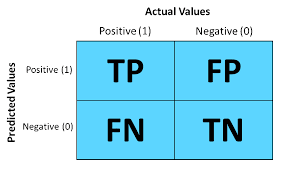

In [44]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[56,  8],
       [16, 24]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

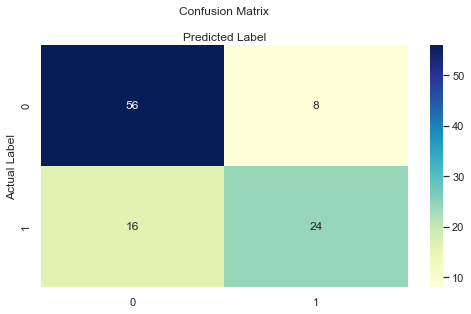

In [45]:
#plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [46]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

### Accuracy 

Accuracy: Percentage of correct predictions. It is calculated by dividing the total number of correct predictions by all the predictions.

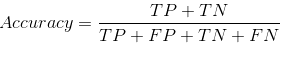

In [47]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.7692

In [48]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))


Accuracy of our model is 0.7692


### Precision 

Correct positive predictions relative to total positive predictions.

Precision checks how many outcomes are actually positive outcomes out of the total positively predicted outcomes.

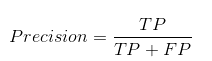

In [49]:
precision_manual_diabetic=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual_diabetic))


Precision of our model is 0.875


### Recall Score

Correct positive predictions relative to total actual positives.

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

The recall is the measure to check correctly positive predicted outcomes out of the total number of positive outcomes.

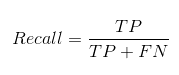

In [50]:
recall_manual_diabetic=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual_diabetic))

Recall of our model is 0.7778


### F-1 Score

F-score is the "harmonic mean" of precision and sensitivity.

It considers both false positive and false negative cases and is good for imbalanced datasets.

The beta value < 1 gives more weight to Precision than Recall and the beta value>1 gives more weight to Recall.

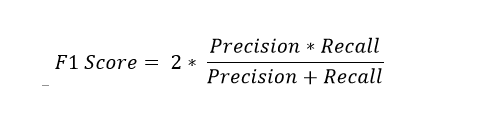

In [51]:
f1_score=2*(precision_manual_diabetic*recall_manual_diabetic)/(precision_manual_diabetic+recall_manual_diabetic)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.8235 


## ROC curve

The Receiver Operating Characteristic (ROC) curve is a two-dimensional curve with the True Positive Rate on the vertical axis and False Positive Rate on the horizontal axis.The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The better the machine learning model, the more the ROC curve will be plotted in the upper left corner.

In the curve, TPR(True Positive Rate) is plotted on Y-axis, whereas FPR(False Positive Rate) is on the X-axis.

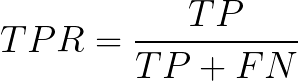

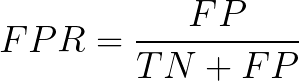

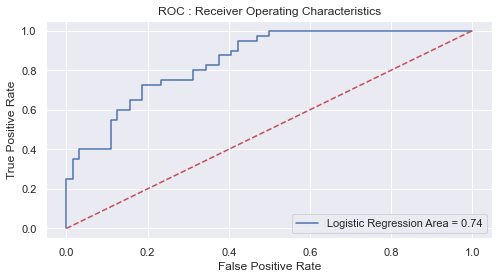

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_score = roc_auc_score(y_test,logistic_reg.predict(X_test))
fpr, tpr, thr = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:,1])
plt.figure(figsize= (8,4))
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

## AUC

Area Under Curve or AUC is one of the most widely used metrics for model evaluation. It is generally used for binary classification problems. AUC measures the entire two-dimensional area present underneath the entire ROC curve.
AUC measures how well a model is able to distinguish between classes.Area Under Curve (AUC) is the proportion of area below the ROC Curve.

The value of AUC ranges from 0 to 1. An excellent model poses an AUC near to the 1 which tells that it has a good measure of separability. A poor model will have an AUC near 0 which describes that it has the worst measure of separability. 

In [53]:
from sklearn.metrics import  auc

roc_auc = round(auc(fpr, tpr))

print("AUC of the model is:", roc_auc)

AUC of the model is: 1


An excellent model poses an AUC near to the 1 which tells that it has a good measure of separability. Hence our model has great separatability and prediction.

In [55]:
from sklearn.metrics import classification_report
print("The Performance of Model for Diabetes dataset: \n{}".format(classification_report(y_test, logistic_reg_pred)))

The Performance of Model for Diabetes dataset: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        64
           1       0.75      0.60      0.67        40

    accuracy                           0.77       104
   macro avg       0.76      0.74      0.75       104
weighted avg       0.77      0.77      0.76       104

